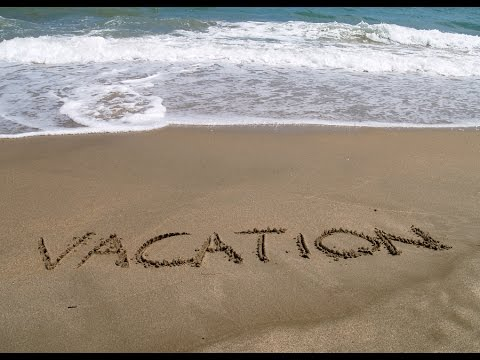

## <center> Swati Oberoi Dham

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [2]:
df = pd.read_csv('../output_data/citi_swati.csv')
df.dropna(inplace = True)
humidity =  df["Humidity"].astype(float)
humidity

0      89.0
1      70.0
2      92.0
3      83.0
4      94.0
       ... 
562    84.0
563    74.0
564    63.0
565    84.0
566    94.0
Name: Humidity, Length: 563, dtype: float64

### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [3]:
gmaps.configure(api_key=g_key)
df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Saldanha,0,ZA,1611947695,89,-33.0117,17.9442,65.19,12.17
1,1,Ushuaia,75,AR,1611947695,70,-54.8000,-68.3000,42.80,23.02
2,2,Tegul'det,100,RU,1611947695,92,57.3064,88.1667,-1.37,6.67
3,3,Teluknaga,75,ID,1611947695,83,-6.0989,106.6381,77.00,11.50
4,4,Hobart,75,AU,1611947696,94,-42.8794,147.3294,60.80,6.91
...,...,...,...,...,...,...,...,...,...,...
562,562,Yellandu,1,IN,1611947810,84,17.6000,80.3333,67.95,3.09
563,563,Maunabo,0,PR,1611947810,74,18.0072,-65.8993,84.00,8.99
564,564,Timizart,0,DZ,1611947598,63,36.8000,4.2667,58.60,4.23
565,565,Alihe,99,CN,1611947811,84,50.5667,123.7167,-23.57,0.40


In [9]:
figure_layout = {
    'width': '1000px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

try : 
    
    heat_layer = gmaps.heatmap_layer(df[['Lat','Lng']], weights=humidity, dissipating=False, max_intensity=10,
                                 point_radius=1)
   
except : 
    print('incorrect location')
fig.add_layer(heat_layer)
fig



Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [10]:
new_df = df.loc[(df['Max Temp']<80) & (df['Max Temp']>70) & (df['Wind Speed']<10) & (df['Cloudiness']==0) & (df['Lat']<90) & (df['Lat']>-90) ].dropna()
new_df.dropna()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
41,41,Saint-Joseph,0,RE,1611947706,69,-21.3667,55.6167,78.80,4.61
87,87,Saint-Philippe,0,RE,1611947716,69,-21.3585,55.7679,78.80,4.61
318,318,Dubti,0,ET,1611947765,53,11.7361,41.0853,73.15,7.83
350,350,Madarounfa,0,NE,1611947771,17,13.3087,7.1560,78.80,6.91
407,407,Pisco,0,PE,1611947782,65,-13.7000,-76.2167,77.00,6.91
419,419,Taoudenni,0,ML,1611947784,17,22.6783,-3.9836,76.98,8.66
461,461,Upington,0,ZA,1611947792,29,-28.4478,21.2561,77.00,5.75
513,513,Pathein,0,MM,1611947801,89,16.7833,94.7333,72.48,6.78
519,519,Pueblo Nuevo,0,MX,1611947802,25,23.3833,-105.3833,73.83,6.44
534,534,Araouane,0,ML,1611947805,18,18.9048,-3.5265,74.21,7.43


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [11]:
hotel_df = new_df
hotel_df.dropna()
# geocoordinates
target_radius = 5000
target_type = "Hotel"
hname = []
base_url = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json?'

for idx, srs in hotel_df.iterrows():
    
    target_coordinates = str(srs['Lat'])+','+str(srs['Lng'])
    # set up a parameters dictionary
    params = {
        "location":target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "keyword":'hotel',
        "key": g_key
    }
    try:
        
        response = requests.get(base_url, params=params)
        data = response.json()
        hname.append(data['results'][0]['name'])#adding hotel name
    except:
        hname.append('No hotel Found')# incase no hotel found in the 5000m radius
hotel_df['Hotel Name'] = hname

In [12]:
hotel_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,Hotel Name
41,41,Saint-Joseph,0,RE,1611947706,69,-21.3667,55.6167,78.80,4.61,ROUGAIL MANGUE
87,87,Saint-Philippe,0,RE,1611947716,69,-21.3585,55.7679,78.80,4.61,Les Embruns Du Baril
318,318,Dubti,0,ET,1611947765,53,11.7361,41.0853,73.15,7.83,No hotel Found
350,350,Madarounfa,0,NE,1611947771,17,13.3087,7.1560,78.80,6.91,No hotel Found
407,407,Pisco,0,PE,1611947782,65,-13.7000,-76.2167,77.00,6.91,HOSTAL MIRAMAR
419,419,Taoudenni,0,ML,1611947784,17,22.6783,-3.9836,76.98,8.66,No hotel Found
461,461,Upington,0,ZA,1611947792,29,-28.4478,21.2561,77.00,5.75,The Maxton Boutique Hotel Upington
513,513,Pathein,0,MM,1611947801,89,16.7833,94.7333,72.48,6.78,Golden Princess Hotel
519,519,Pueblo Nuevo,0,MX,1611947802,25,23.3833,-105.3833,73.83,6.44,No hotel Found
534,534,Araouane,0,ML,1611947805,18,18.9048,-3.5265,74.21,7.43,No hotel Found


In [13]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
hotel_name = list(hotel_df['Hotel Name'])

locations = hotel_df[["Lat", "Lng"]]
# # Assign the marker layer to a variable

markers = gmaps.marker_layer(locations,hover_text = hotel_name, info_box_content = hotel_info,display_info_box=True)

# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…